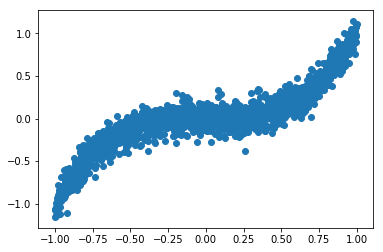

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable

torch.manual_seed(1)  # 确定随机种子，保证结果可重复

LR = 0.01
BATCH_SIZE = 20
EPOCH = 10

# 生成数据
x = torch.unsqueeze(torch.linspace(-1, 1, 1500), dim=1)
y = x.pow(3) + 0.1 * torch.normal(torch.zeros(*x.size()))

# 绘制数据分布
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [12]:
y = torch.linspace(-1, 1, 1500)
y.shape

torch.Size([1500])

In [11]:
x.shape

torch.Size([1500, 1])

In [3]:
# 把数据转换为torch类型
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, )

TypeError: __init__() got an unexpected keyword argument 'data_tensor'

In [1]:
# 定义模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)  # 隐藏层
        self.predict = torch.nn.Linear(20, 1)  # 输出层

    def forward(self, x):
        # pdb.set_trace()
        x = F.relu(self.hidden(x))  # 隐藏层的激活函数
        x = self.predict(x)  # 线性输出
        return x


# 不同的网络模型
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_AdaGrad = Net()
net_Adam = Net()

nets = [net_SGD, net_Momentum, net_AdaGrad, net_RMSprop, net_Adam]
# 不同的优化器
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)

opt_AdaGrad = torch.optim.Adagrad(net_AdaGrad.parameters(), lr=LR)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_AdaGrad, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], [], []]  # 记录loss用

# 模型训练
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)  # 前向算法的结果
            loss = loss_func(output, b_y)  # 计算loss
            opt.zero_grad()  # 梯度清零
            loss.backward()  # 后向算法，计算梯度
            opt.step()  # 应用梯度
            l_his.append(loss.data[0])  # 记录loss

labels = ['SGD', 'Momentum', 'AdaGrad', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

<Figure size 640x480 with 1 Axes>

TypeError: __init__() got an unexpected keyword argument 'data_tensor'